# Denoising

![](https://images.unsplash.com/photo-1548069124-75c4a08968cc?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

Picture by [Anton Scherbakov](https://unsplash.com/photos/ZLBUaIsaY6k)

We will here use AutoEncoders for denoising images.

The idea is simple: train an autoencoder on noiseless images. Once the autoencoder is trained, input a noisy image, it should output the denoised image.

Let's work again with the MNIST fashion dataset. Load it.

First download the dataset. As a reminder, the labels are the following:
* 0:	T-shirt/top
* 1:	Trouser
* 2:	Pullover
* 3:	Dress
* 4:	Coat
* 5:	Sandal
* 6:	Shirt
* 7:	Sneaker
* 8:	Bag
* 9:	Ankle boot

In [41]:
import numpy as np

In [42]:
### TODO: Import the dataset and display an image
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Build an autoencoder for those images. You can reuse the architecture of the lectures.

> Since this is for denoising (not any generation), a regular autoencoder is good enough!

In [43]:
## Data preparation
# Normalize the data
X_train = X_train / 255
X_test = X_test / 255

# Reshape the data
n_pixels = np.prod(X_train.shape[1:])

In [44]:
### TODO: Build an autoencoder
from keras.layers import Input, Dense
from keras import Model

"""
latent_dim = 32

# define the input layer: the pixel values
input_img = Input(shape=(n_pixels,))

# encode
encoded = Dense(latent_dim, activation="relu")(input_img)

# decode
decoded = Dense(n_pixels, activation="sigmoid")(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)
"""

'\nlatent_dim = 32\n\n# define the input layer: the pixel values\ninput_img = Input(shape=(n_pixels,))\n\n# encode\nencoded = Dense(latent_dim, activation="relu")(input_img)\n\n# decode\ndecoded = Dense(n_pixels, activation="sigmoid")(encoded)\n\n# Define the autoencoder model\nautoencoder = Model(input_img, decoded)\n'

In [55]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

n_pixels = np.prod(X_train.shape[1:])
print(f'n_pixels: {n_pixels}') #784: OK
latent_dim = 128

# define the input layer: the pixel values
input_img = Input(shape=(n_pixels,))

# encode
encoded = Dense(latent_dim, activation='relu')(input_img)

# decode
decoded = Dense(n_pixels, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Define de encoder model
encoder = Model(input_img, encoded)

# Define de decoder model
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(latent_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

n_pixels: 784


Now compile and train your AutoEncoder using the fashion data.

In [56]:
### TODO: Train the autoencoder
X_train_flat = X_train.reshape(X_train.shape[0], np.prod(X_train.shape[1:]))
X_test_flat = X_test.reshape(X_test.shape[0], np.prod(X_test.shape[1:]))

autoencoder.compile(optimizer='adam', loss='mse')

batch_size = 256

autoencoder.fit(X_train_flat, X_train_flat,
                epochs=25,
                batch_size=batch_size,
                validation_data=(X_test_flat, X_test_flat))

Epoch 1/25
235/235 [==============================] - 2s 8ms/step - loss: 0.0455 - val_loss: 0.0252
Epoch 2/25
235/235 [==============================] - 2s 8ms/step - loss: 0.0202 - val_loss: 0.0165
Epoch 3/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0142 - val_loss: 0.0125
Epoch 4/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0116 - val_loss: 0.0109
Epoch 5/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 6/25
235/235 [==============================] - 2s 9ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 7/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0088 - val_loss: 0.0086
Epoch 8/25
235/235 [==============================] - 2s 8ms/step - loss: 0.0083 - val_loss: 0.0082
Epoch 9/25
235/235 [==============================] - 2s 8ms/step - loss: 0.0079 - val_loss: 0.0078
Epoch 10/25
235/235 [==============================] - 2s 10ms/step - loss: 0.0075 - val_loss: 0.

Check out how your model worked: display some pairs of input and output images.

313/313 [==============================] - 1s 2ms/step


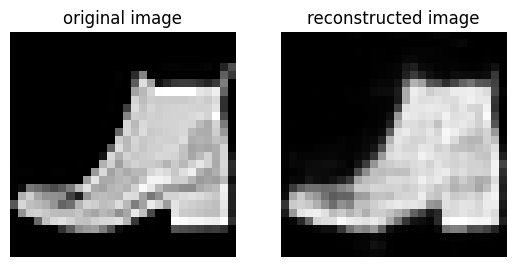

In [60]:
### TODO: Display some reconstructed images
import matplotlib.pyplot as plt
import pandas as pd

# Get the predictions
X_pred = autoencoder.predict(X_test_flat)

# Show some reconstructed images
idx = np.random.randint(X_test.shape[0])

plt.subplot(121)
plt.imshow(X_test_flat[idx].reshape(28, 28), cmap=plt.cm.gray)
plt.title("original image")
plt.axis("off")
plt.subplot(122)
plt.imshow(X_pred[idx].reshape(28, 28), cmap=plt.cm.gray)
plt.title("reconstructed image")
plt.axis("off")
plt.show()

We have defined below a function to add noise.

In [61]:
def add_noise(X_train, noise_factor=0.35):
    X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0*X_train.max(), size=X_train.shape) 
    X_train_noisy = np.clip(X_train_noisy, 0., 1.)

    return X_train_noisy

Use this function to create a noisy dataset of the test images. Display some noisy images.

In [63]:
### TODO: Create a noisy dataset
X_test_noisy = add_noise(X_test, noise_factor=0.2)
X_test_noisy.shape

(10000, 28, 28)

In [64]:
## flatten
X_test_noisy_flat = X_test_noisy.reshape(X_test_noisy.shape[0], np.prod(X_test_noisy.shape[1:]))

If you used the default `noise_factor` parameter, you should barely distinguish some images by eye, but you can tune it differently if you wish to.

Now try using your trained autoencoder: use the autoencoder with the noisy images as input, and try to predict the denoised images.

In [65]:
### TODO: Use the autoencoder to denoise images
# Get the predictions
X_pred_denoise = autoencoder.predict(X_test_noisy_flat)

313/313 [==============================] - 0s 1ms/step


Now display side by side a noisy image and the denoised image.

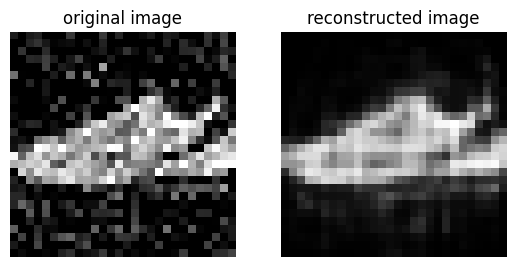

In [67]:
### TODO: Display side by side the noisy and denoised images
# Show some reconstructed images
idx = np.random.randint(X_test_noisy.shape[0])

plt.subplot(121)
plt.imshow(X_test_noisy_flat[idx].reshape(28, 28), cmap=plt.cm.gray)
plt.title("original image")
plt.axis("off")
plt.subplot(122)
plt.imshow(X_pred_denoise[idx].reshape(28, 28), cmap=plt.cm.gray)
plt.title("reconstructed image")
plt.axis("off")
plt.show()

How did that work?

## Optional

You can get better results using CNN autoencoder instead of regular autoencoder.

If you have time, you can have a try. You might need to use the `UpSampling2D` layer, which is the opposite of the `MaxPooling2D` layer.

In [8]:
### TODO: Redo the exercise with a CNN autoencoder